In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization,Input,ZeroPadding2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#PART 1 :  Digit recognition using CNNs

#Code:

In [ ]:
# Step 1: Read and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data for 28x28 grayscale images
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [ ]:
# Step 2: Construct a CNN-based model with complexity higher than AlexNet

model = Sequential()
model.add(Input((28, 28, 1)))
model.add(ZeroPadding2D ((2,2)))
model.add(Conv2D (64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D (64, (3,3), strides=1, padding='same', activation= 'relu'))
model.add(MaxPool2D((2,2),strides=2))
model.add(Conv2D (128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D (128, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D((2,2),strides=2))
model.add(Conv2D (256, (3,3), strides =1, padding='same', activation='relu'))
model.add(Conv2D (256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D (256, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D((2,2),strides=2))
model.add(Flatten())
model.add(Dense (4096, activation='relu'))
model.add(Dense (128, activation='relu'))
model.add(Dense (10, activation='softmax'))

opt = SGD(learning_rate=1e-4,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
# Step 3: Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    validation_data=(x_test, y_test),
    epochs=20
)

# Save the trained model
model.save("vgg16_mnist.h5")


Epoch 1/20
1875/1875 [==============================] - 153s 81ms/step - loss: 2.2948 - accuracy: 0.2065 - val_loss: 2.2860 - val_accuracy: 0.2645
Epoch 2/20
1875/1875 [==============================] - 149s 80ms/step - loss: 2.2516 - accuracy: 0.4521 - val_loss: 2.1312 - val_accuracy: 0.5860
Epoch 3/20
1875/1875 [==============================] - 150s 80ms/step - loss: 0.7979 - accuracy: 0.8035 - val_loss: 0.2925 - val_accuracy: 0.9065
Epoch 4/20
1875/1875 [==============================] - 150s 80ms/step - loss: 0.2379 - accuracy: 0.9254 - val_loss: 0.1939 - val_accuracy: 0.9386
Epoch 5/20
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1653 - accuracy: 0.9493 - val_loss: 0.1517 - val_accuracy: 0.9520
Epoch 6/20
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1296 - accuracy: 0.9595 - val_loss: 0.1206 - val_accuracy: 0.9605
Epoch 7/20
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1077 - accuracy: 0.9662 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test Loss: 0.0522
Test Accuracy: 0.9833


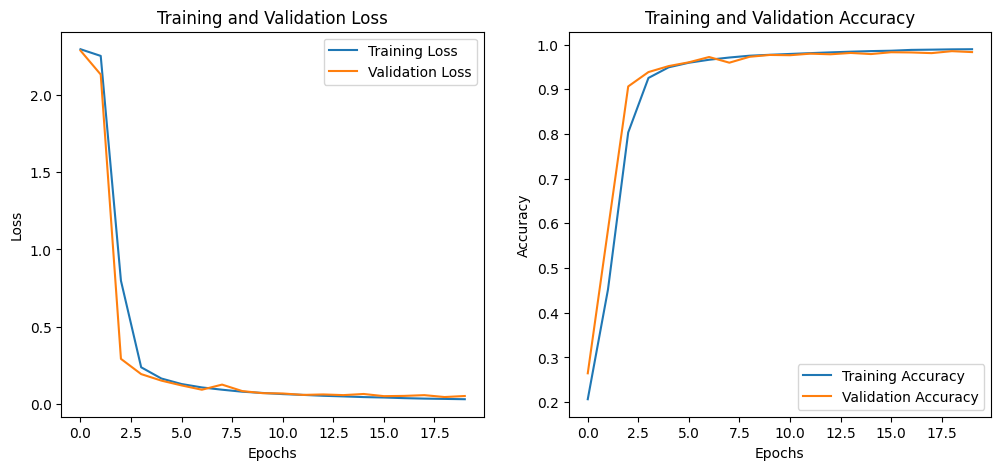

In [ ]:
# Step 4: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Results:

In this task, I built and trained a convolutional neural network (CNN) for the recognition of handwritten digits from the MNIST dataset. The goal was to create a model that is more complex than AlexNet, and I choosed a VGG16 architecture. The process involves several key steps: reading and preprocessing the data, constructing the CNN model, training it, and then evaluating its performance.VGG16 is an architecture which is more complex than AlexNet and also it gave good results. Actually i tried different modals but it did not give good result.

##Data Preparation:
The MNIST dataset, consisting of 28x28 grayscale images of handwritten digits (0-9), was loaded using the mnist.load_data() function, which separates the data into training and testing sets. The data was preprocessed as follows:

*   The images were reshaped into a 4D tensor format ([batch_size, height, width, channels]) to match the input requirements of the CNN.
*   The pixel values were normalized to the range [0, 1] by dividing by 255, ensuring faster convergence during training.
*   The labels were one-hot encoded, transforming the digits into binary vectors, as required for categorical classification tasks.


##Model Architecture:
The VGG16 model was designed with multiple convolutional layers followed by max-pooling layers, enabling the extraction of hierarchical patterns from the data. The architecture consisted of:

* Convolutional Layers: These layers, starting with 64 filters and increasing in depth to 128 and 256 filters, were used to extract increasingly complex features from the images.
* Max-Pooling Layers: These layers were used to downsample the feature maps, reducing spatial dimensions and helping control overfitting.
* Fully Connected Layers: The output from the convolutional and pooling layers was flattened and passed through fully connected layers. The first dense layer contained 4096 units, followed by a layer with 128 units. The final output layer had 10 units, corresponding to the 10 digit classes, with a softmax activation to produce probabilities for each class.

*   The model was compiled using the Stochastic Gradient Descent (SGD) optimizer
with a learning rate of 1e-4 and momentum of 0.9. This configuration was chosen to accelerate convergence and avoid local minima. Categorical cross-entropy was used as the loss function, which is standard for multi-class classification tasks. Accuracy was used as the metric to evaluate the model’s performance.
*   The model was trained using the model.fit() function. The training data, batch size (32), number of epochs (20), and validation data were specified during the training process. The weights of the model were updated based on the gradients calculated from the training data, and the performance on the validation data was monitored during training to ensure the model generalized well to unseen data.
*   After training, the model was saved to a file (vgg16_mnist.h5) for future use, allowing it to be loaded and used again without retraining. The model’s performance was then evaluated on the test dataset to assess how well it generalized to new, unseen data.



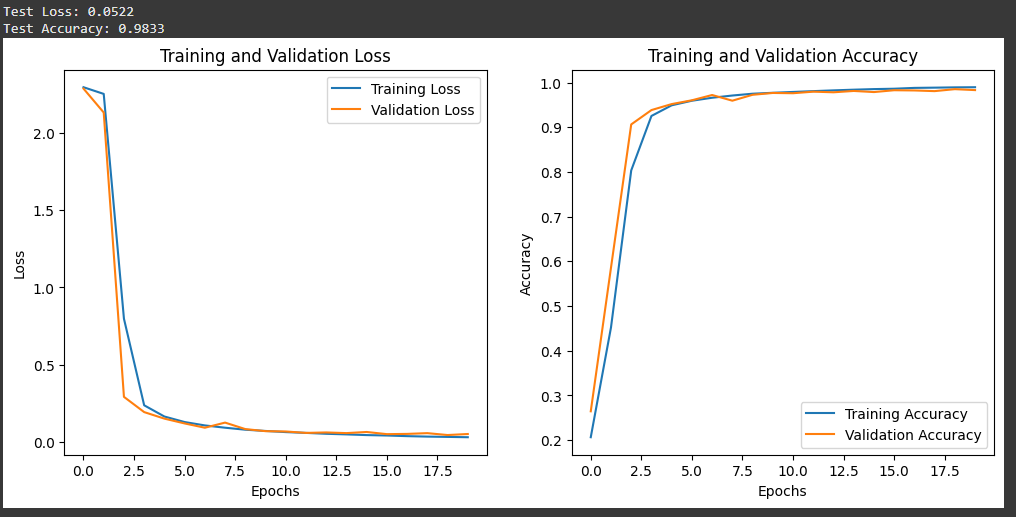

## Comments

*   This model is suitable for this task and it has %98.33 accuracy rate which is really higher but there are models even close to %100 accuracy rate in this dataset. Maybe better results could be fine but in this task i thought its enough at least this model is better than others for my results. Other models have overfitting problem and it could be a problem.

#Part 2:Input optimization for a CNN

Step 0, Loss: 16.90467643737793


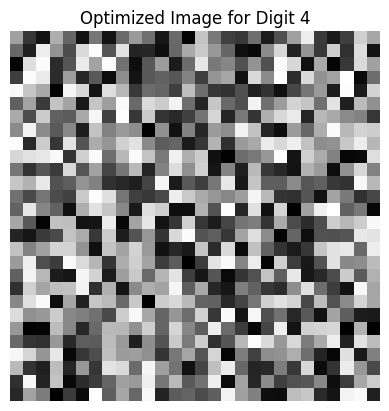

Step 200, Loss: 10.550016403198242


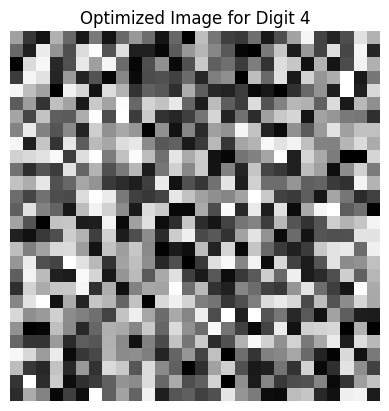

Step 400, Loss: 5.016602516174316


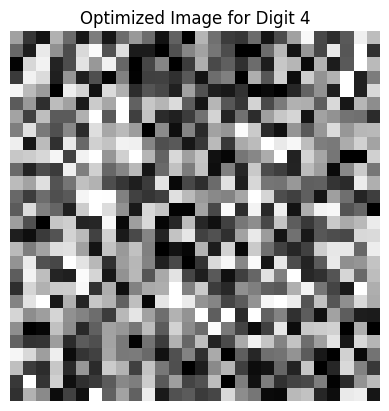

Step 600, Loss: 1.128839135169983


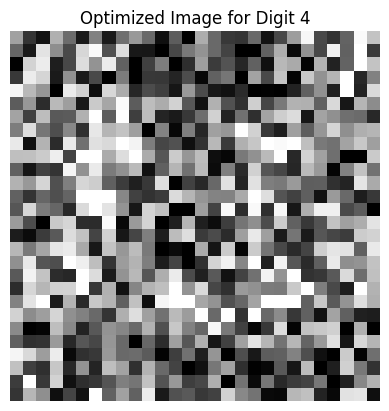

Step 800, Loss: 0.33252909779548645


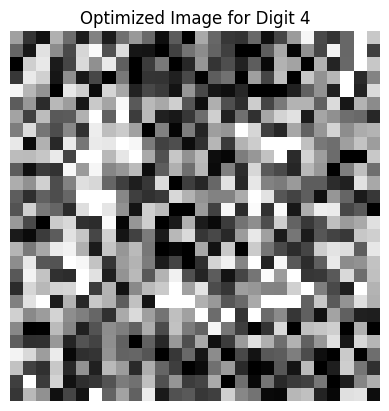

In [97]:
from tensorflow.keras.models import load_model

model = load_model('vgg16_mnist.h5')
#model.summary()

# Desired output: One-hot encoded vector
target_output = tf.constant([[0, 0, 0, 0, 1, 0, 0, 0,0, 0]], dtype=tf.float32)

# Create a random image with values in [0, 1]
random_image = np.random.uniform(0, 1, (1, 28, 28, 1)).astype('float32')

# Define the loss function
def loss_fn(image):
    prediction = model(image)  # Model prediction
    loss = tf.keras.losses.categorical_crossentropy(target_output, prediction)
    return loss

# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Ensure pixel values stay in [0, 1]

def clip_image(image):
    return tf.clip_by_value(image, 0.0, 1.0)

# Optimize the random image
image = tf.Variable(random_image)  # Make the image trainable

for step in range(1000):  # Run for 200 steps
    with tf.GradientTape() as tape:
        loss = loss_fn(image)
    grads = tape.gradient(loss, [image])
    optimizer.apply_gradients(zip(grads, [image]))
    image.assign(clip_image(image))  # Clip pixel values to [0, 1]

    if step % 200 == 0:  # Print progress every 50 steps
        print(f"Step {step}, Loss: {loss.numpy().mean()}")
        optimized_image = image.numpy().squeeze()
        plt.imshow(optimized_image, cmap='gray')
        plt.title("Optimized Image for Digit 4")
        plt.axis('off')
        plt.show()


In [104]:
from PIL import Image

# Save optimized image as a file
output_image = (optimized_image * 255).astype('uint8')  # Scale to 0-255
Image.fromarray(output_image).save("optimized_digit_4.png")


Step 0, Loss: 35.42654800415039
Step 100, Loss: 25.651628494262695
Step 200, Loss: 13.053720474243164
Step 300, Loss: 2.909550905227661
Step 400, Loss: 0.2663176357746124
Step 500, Loss: 0.10599647462368011
Step 600, Loss: 0.0655767172574997
Step 700, Loss: 0.04756855592131615
Step 800, Loss: 0.03745424747467041
Step 900, Loss: 0.030706921592354774


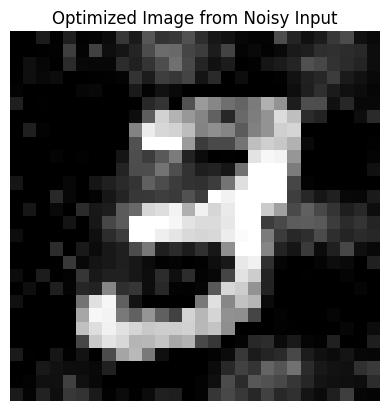

In [101]:
# Get a sample of digit 1 from the training set
digit_image = x_train[np.argmax(y_train, axis=1) == 3][0]  # Select a digit 1 image

# Add random noise to the digit image
noisy_image = digit_image + np.random.normal(0, 0.1, digit_image.shape)
noisy_image = np.clip(noisy_image, 0, 1).astype('float32')

# Perform optimization starting from noisy image
image = tf.Variable(np.expand_dims(noisy_image, axis=0))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

for step in range(1000):  # Run for 100 steps
    with tf.GradientTape() as tape:
        loss = loss_fn(image)
    grads = tape.gradient(loss, [image])
    optimizer.apply_gradients(zip(grads, [image]))
    image.assign(clip_image(image))  # Clip pixel values to [0, 1]

    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss.numpy().mean()}")

# Visualize the result
optimized_noisy_image = image.numpy().squeeze()
plt.imshow(optimized_noisy_image, cmap='gray')
plt.title("Optimized Image from Noisy Input")
plt.axis('off')
plt.show()


Step 0, Loss: 2.20053768157959
Step 50, Loss: 1.6753888130187988
Step 100, Loss: 1.3718055486679077
Step 150, Loss: 1.185283899307251
Step 200, Loss: 1.063241958618164
Step 250, Loss: 0.9826529026031494
Step 300, Loss: 0.9281226396560669
Step 350, Loss: 0.8897497653961182
Step 400, Loss: 0.8625383973121643
Step 450, Loss: 0.8416637778282166
Step 500, Loss: 0.824780285358429
Step 550, Loss: 0.8113717436790466
Step 600, Loss: 0.8005730509757996
Step 650, Loss: 0.7914835810661316
Step 700, Loss: 0.78347247838974
Step 750, Loss: 0.7767586708068848
Step 800, Loss: 0.7709232568740845
Step 850, Loss: 0.7657535672187805
Step 900, Loss: 0.7611703872680664
Step 950, Loss: 0.7572969198226929


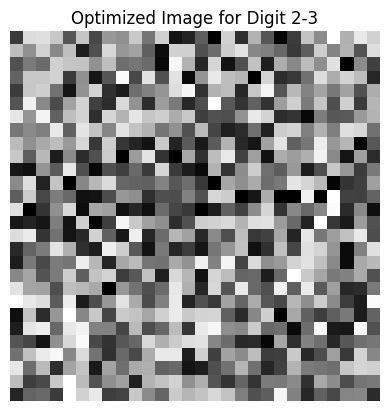

In [102]:
# Desired output: One-hot encoded vector for digit 1
target_output = tf.constant([[0, 0, 0.5, 0.5, 0, 0, 0, 0,0, 0]], dtype=tf.float32)

# Create a random image with values in [0, 1]
random_image = np.random.uniform(0, 1, (1, 28, 28, 1)).astype('float32')

# Define the loss function
def loss_fn(image):
    prediction = model(image)  # Model prediction
    loss = tf.keras.losses.categorical_crossentropy(target_output, prediction)
    return loss

# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Ensure pixel values stay in [0, 1]
@tf.function
def clip_image(image):
    return tf.clip_by_value(image, 0.0, 1.0)

# Optimize the random image
image = tf.Variable(random_image)  # Make the image trainable

for step in range(1000):  # Run for 100 steps
    with tf.GradientTape() as tape:
        loss = loss_fn(image)
    grads = tape.gradient(loss, [image])
    optimizer.apply_gradients(zip(grads, [image]))
    image.assign(clip_image(image))  # Clip pixel values to [0, 1]

    if step % 50 == 0:  # Print progress every 10 steps
        print(f"Step {step}, Loss: {loss.numpy().mean()}")

# Visualize the optimized image
optimized_image = image.numpy().squeeze()
plt.imshow(optimized_image, cmap='gray')
plt.title("Optimized Image for Digit 2-3")
plt.axis('off')
plt.show()


In [103]:
from PIL import Image

# Save optimized image as a file
output_image = (optimized_image * 255).astype('uint8')  # Scale to 0-255
Image.fromarray(output_image).save("optimized_digit_both2_3.png")

#Results:


The goal of this task was to optimize an input image such that the trained CNN model outputs a specific target class. The process was carried out using gradient descent to iteratively refine the input image.

##Target Output Specification
The desired target output was defined as a one-hot encoded vector:
[0,0,0,0,1,0,0,0,0,0] . This represents the digit "4".
##Random Image Initialization
A random image was created with pixel values uniformly distributed within the range [0,1]. The shape of the image was set to (1,28,28,1), corresponding to a grayscale MNIST image. The random image served as the initial input for optimization.

##Loss Function Definition
A loss function was defined to compute the error between the model’s predicted output and the desired target output. The categorical cross-entropy loss was used for this purpose.Predictions were obtained by feeding the current input image to the trained CNN model.Categorical cross-entropy loss function is good for this problem.Categorical cross-entropy takes the target labels as One Hot Encoded Vectors.

##Optimization Process
The SGD optimizer was employed with a learning rate of
0.001 to iteratively minimize the loss. Gradient descent was applied to the pixel values of the input image.

##Trainin Loop
The optimization was performed for 200 steps. During each step:
Gradients of the loss with respect to the input image were calculated using TensorFlow’s GradientTape.The optimizer applied the gradients to update the image.The pixel values of the updated image were clipped to remain within the range [0,1].Progress was visualized every 50 steps by displaying the current state of the optimized image along with the corresponding loss value.

##Visualization
At intervals, the optimized image was displayed using a grayscale colormap to observe its progression toward representing the digit "4". But not understandable by human eye.


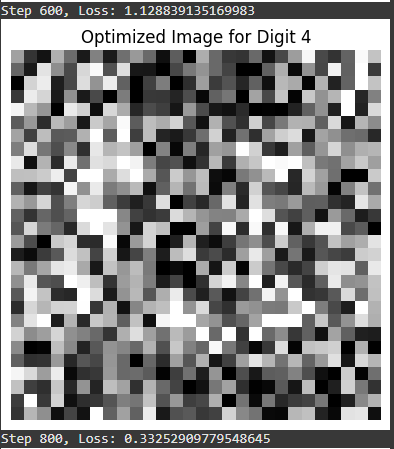


*   The loss value consistently decreased over the optimization steps, indicating that the model’s output was increasingly aligned with the target output.

*   Despite the optimization process, the final image remained challenging to interpret visually, which can be attributed to the model’s internal representation of features rather than global patterns recognizable to the human eye.

## Selection of Initial Image
An image of the digit "3" was selected from the training dataset. The selection was made by filtering the dataset based on the label index corresponding to the digit "3." The chosen image was used as the basis for creating the noisy input.The optimizer and other parameters are same with above.

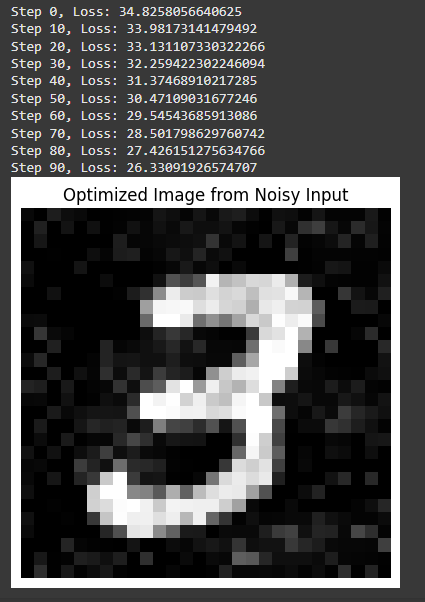

*   Error is high but its more understandable by human eye in first try.

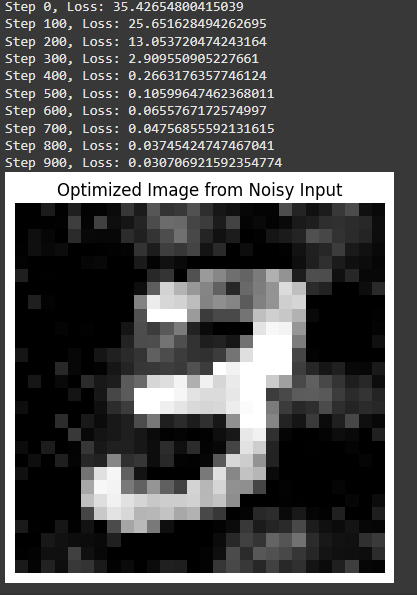

*   Now its more understandable for model which error is low but for human eye its going worse.


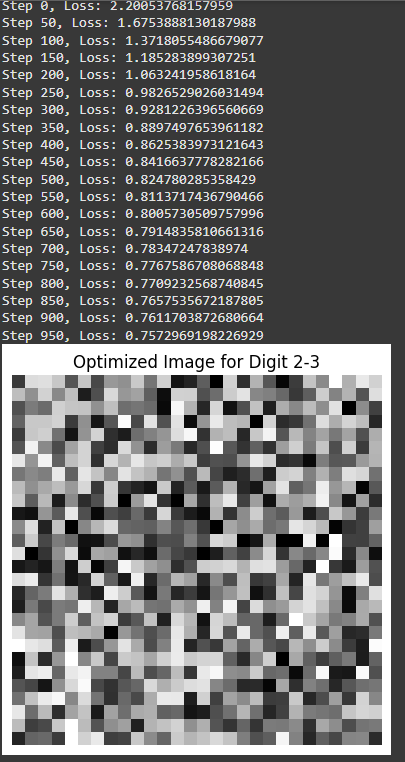

*   These steps were repeated for Digit 2-3 [0,0,0.5,0.5,0,0,0,0,0,0] and not an understandable image for human eye but which is optimazated for model.

*   Best output image is the an actual image of the digit with noise added for human eye but Optimized Digit 4 is the best for model.Because it generated by model and has lower loss.

##Initialization:

*   Random Noise: Starting with completely random noise often results in abstract, unrecognizable images.
*   Noisy Dataset Image: Adding noise to a real dataset image provided a structured starting point, making the optimization process more effective by refining an existing pattern.

##Potential Problems and Solutions:
*   Convergence Issues: The optimization could converge to a poor local minimum. A small learning rate (0.001) and multiple initialization trials helped mitigate this.Pixel Value Regularization: Pixel values might fall outside the valid range. Clipping was applied to ensure values stayed between [0,1].
*   Instability: Gradients may be too sensitive to small changes. SGD provided stability during optimization.
*   Interpretability: Random noise initialization led to less interpretable images. Using a noisy image from the dataset improved the clarity of the results.
*   Overfitting: The optimization could focus too much on the target vector. Regularization and iterative visualization helped avoid overfitting and kept the images realistic.

#Comments:
*   First of all , generate input image is not working correctly.We can say that its normal because its not a generative model. GAN will be useful for generate image.
*   Initially, the image appeared as random noise, but after several iterations of optimization, the model's prediction became more aligned with the desired target.
*   The image generated directly by model is not succesful for human eye.
*   Optimization with a noisy initial image provided a more structured starting point, resulting in faster convergence and a more interpretable output compared to starting from pure random noise.
*  The results showed that the optimization process is sensitive to initialization, with noisy inputs leading to more interpretable results.